In [1]:
import bz2
import json
import pandas as pd

In [2]:
filename = 'RC_2015-01.bz2'

In [3]:
with bz2.open(filename, "rt") as bzinput:
    lines = []
    for i, line in enumerate(bzinput):
        if i == 200000:
            break
        reddit = json.loads(line)
        lines.append(reddit)
        

In [4]:
df = pd.DataFrame(lines)

In [5]:
df.columns

Index(['score_hidden', 'name', 'link_id', 'body', 'downs', 'created_utc',
       'score', 'author', 'distinguished', 'id', 'archived', 'parent_id',
       'subreddit', 'author_flair_css_class', 'author_flair_text', 'gilded',
       'retrieved_on', 'ups', 'controversiality', 'subreddit_id', 'edited'],
      dtype='object')

In [6]:
df.head()

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnas8zv,t3_2qyr1a,Most of us have some family members like this....,0,1420070400,14,YoungModern,None,cnas8zv,...,t3_2qyr1a,exmormon,None,None,0,1425124282,14,0,t5_2r0gj,False
1,False,t1_cnas8zw,t3_2qv6c6,But Mill's career was way better. Bentham is l...,0,1420070400,3,RedCoatsForever,None,cnas8zw,...,t1_cnas2b6,CanadaPolitics,on,Ontario,0,1425124282,3,0,t5_2s4gt,False
2,False,t1_cnas8zx,t3_2qxefp,"Mine uses a strait razor, and as much as i lov...",0,1420070400,1,vhisic,None,cnas8zx,...,t3_2qxefp,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
3,False,t1_cnas8zy,t3_2qys4x,[deleted],0,1420070400,1,[deleted],None,cnas8zy,...,t3_2qys4x,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
4,False,t1_cnas8zz,t3_2qm5bi,"Very fast, thank you!",0,1420070400,2,Mastersimpson,None,cnas8zz,...,t3_2qm5bi,freedonuts,None,None,0,1425124282,2,0,t5_2y51u,False


In [7]:
pf=df

In [8]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   score_hidden            200000 non-null  bool  
 1   name                    200000 non-null  object
 2   link_id                 200000 non-null  object
 3   body                    200000 non-null  object
 4   downs                   200000 non-null  int64 
 5   created_utc             200000 non-null  object
 6   score                   200000 non-null  int64 
 7   author                  200000 non-null  object
 8   distinguished           1409 non-null    object
 9   id                      200000 non-null  object
 10  archived                200000 non-null  bool  
 11  parent_id               200000 non-null  object
 12  subreddit               200000 non-null  object
 13  author_flair_css_class  73807 non-null   object
 14  author_flair_text       74295 non-nu

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['link_id']=le.fit_transform(df['link_id'])
df['author']=le.fit_transform(df['author'])
df['parent_id']=le.fit_transform(df['parent_id'])
df['subreddit']=le.fit_transform(df['subreddit'])

## Clearing rows

In [7]:
df=df[df['body']!='[deleted]']
df=df[df['score_hidden']==False]
df=df[df['author']!='[deleted]']
df.shape

(183414, 21)

### Work on body

In [12]:
import nltk
import re

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
lt=stopwords.words('English')
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

In [14]:
lx=[]
lx1=[]
for x in df['body']:
    x=re.sub('[^a-zA-s]',' ',x)
    words=word_tokenize(x)
    clean_t=""
    fin=[]
    for word in words:
        if not word in lt:
            clean_t=lemmatizer.lemmatize(word)+" "
            fin.append(word)
    lx.append(clean_t)
    lx1.append(fin)

In [15]:
ls=[]
for sent in lx1:
    
    cln=""
    for words in sent:
        cln=cln+lemmatizer.lemmatize(words)+" "
    ls.append(cln)

In [17]:
from afinn import Afinn
af=Afinn()
lt=[]
for sent in ls:
    lt.append(af.score(sent))

In [18]:
df['body']=lt

In [11]:
import matplotlib.pyplot as plt 


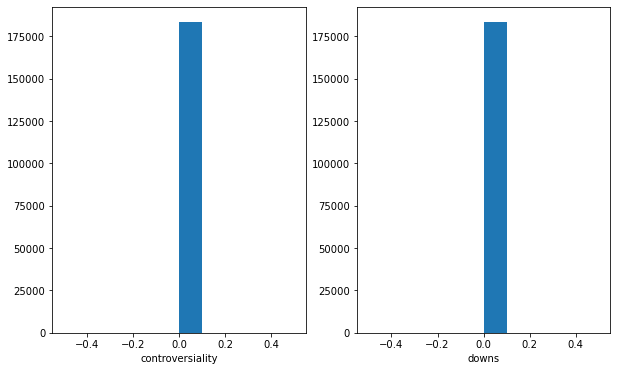

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6))
ax1.hist(df['controversiality'])
ax1.set_xlabel('controversiality')
ax2.hist(df['downs'])
ax2.set_xlabel('downs')

plt.show()

In [24]:
df.archived.value_counts()

False    183414
Name: archived, dtype: int64

# Removing the unwanted columns

In [18]:
for x in df.columns:
    print(df[x].value_counts())

False    183414
Name: score_hidden, dtype: int64
t1_cnattf1    1
t1_cnatb98    1
t1_cnatvwe    1
t1_cnat7pu    1
t1_cnawe4j    1
             ..
t1_cnavio2    1
t1_cnauz7y    1
t1_cnasf98    1
t1_cnawk3w    1
t1_cnawgvv    1
Name: name, Length: 183414, dtype: int64
32798    3112
25086    1693
28715    1583
23574    1415
23754    1356
         ... 
10690       1
8643        1
6596        1
4549        1
0           1
Name: link_id, Length: 41915, dtype: int64
Hi there, looks like you're wanting to discuss something related to the new year; thankfully, we have a dedicated thread for that! [Go here to participate!](http://redd.it/2qxd1t)  Happy holidays!\n\n*[I am a bot](/r/AutoModerator/comments/q11pu/what_is_automoderator/), and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose?to=%2Fr%2FAskReddit) if you have any questions or concerns.*    170
Thanks!                                                                               

t5_2qh1i    12995
t5_2qm9d     5902
t5_2qiel     4723
t5_2qh33     3957
t5_2qo4s     3243
            ...  
t5_2qmyp        1
t5_2tqjh        1
t5_2qkoi        1
t5_2sutg        1
t5_2tmy9        1
Name: subreddit_id, Length: 6335, dtype: int64
0    178833
1      4581
Name: edited, dtype: int64


# Make df_fin =df

In [42]:
df_fin=df

## Changing edited

In [10]:
ls=[]
for x in df.edited:
    if x ==False:
        ls.append(0)
    else:
        ls.append(1)
df.edited=ls

# Remove useless create datasets

In [69]:
df1=df[[ 'link_id', 'body',
       'score', 'author', 'parent_id',
       'subreddit', 'author_flair_css_class',  'gilded',
          'edited']]

In [74]:
df1.author_flair_css_class.value_counts()

TORNHL          751
default         656
i-gpcm-steam    622
default         607
i-gpcm          580
               ... 
martyb            1
vag               1
hannibal          1
88kane            1
LordDrac          1
Name: author_flair_css_class, Length: 9592, dtype: int64

In [80]:
df1=df1[df1['author_flair_css_class']!=""]
df1.shape
df1['author_flair_css_class']=le.fit_transform(df1['author_flair_css_class'])

In [81]:
df1=df1.dropna()
df1.head()

,link_id,body,score,author,parent_id,subreddit,author_flair_css_class,gilded,edited
1,8701,4.0,3,32055,42169,538,7093,0,0
8,28443,0.0,1,77457,44102,435,1020,0,0
10,29276,0.0,2,80325,43913,4482,4464,0,0
13,7803,-2.0,2,70423,18581,1955,4385,0,0
14,31119,1.0,2,59666,41938,4486,1126,0,0


In [29]:
df.link_id.value_counts()

32798    3112
25086    1693
28715    1583
23574    1415
23754    1356
         ... 
10690       1
8643        1
6596        1
4549        1
0           1
Name: link_id, Length: 41915, dtype: int64

In [100]:
df2=df1
ls1=[]
ls2=[]
for vals in df2['body']:
    if(vals>0):
        ls1.append(vals)
        ls2.append(0)
    else:
        ls1.append(0)
        ls2.append(-1*vals)

In [113]:
df2['pos']=ls1

df2['neg']=ls2
df2=df2[['link_id', 'score', 'author', 'parent_id', 'subreddit',
       'author_flair_css_class', 'gilded', 'edited', 'pos', 'neg']]
df2.columns

Index(['link_id', 'score', 'author', 'parent_id', 'subreddit',
       'author_flair_css_class', 'gilded', 'edited', 'pos', 'neg'],
      dtype='object')

In [41]:
df

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnas8zv,32083,4.0,0,1420070400,14,44046,None,cnas8zv,...,113416,4099,None,None,0,1425124282,14,0,t5_2r0gj,False
1,False,t1_cnas8zw,8701,4.0,0,1420070400,3,32055,None,cnas8zw,...,42169,538,on,Ontario,0,1425124282,3,0,t5_2s4gt,False
2,False,t1_cnas8zx,17505,6.0,0,1420070400,1,83148,None,cnas8zx,...,102280,106,None,None,0,1425124282,1,0,t5_2s7tt,False
4,False,t1_cnas8zz,3094,2.0,0,1420070400,2,24503,None,cnas8zz,...,95529,4233,None,None,0,1425124282,2,0,t5_2y51u,False
5,False,t1_cnas900,17409,0.0,0,1420070400,6,4728,None,cnas900,...,32370,3044,None,None,0,1425124282,6,0,t5_2qh61,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,t1_cnawl5m,41185,5.0,0,1420080960,1,73848,None,cnawl5m,...,92554,556,None,None,0,1425122260,1,0,t5_323oy,False
199995,False,t1_cnawl5n,3702,1.0,0,1420080960,1,40764,None,cnawl5n,...,94144,5548,,Wilhelm Jung | Nikolas Brunoz,0,1425122260,1,0,t5_32s5j,False
199996,False,t1_cnawl5o,41533,0.0,0,1420080960,2,3154,None,cnawl5o,...,122752,1484,None,None,0,1425122260,2,0,t5_2w8pb,False
199997,False,t1_cnawl5p,15300,7.0,0,1420080960,4,20837,None,cnawl5p,...,8133,5368,None,None,0,1425122260,4,0,t5_2sl0y,False


In [46]:
df.shape

(183414, 21)

# Working with df1

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
df1.columns

Index(['link_id', 'body', 'score', 'author', 'parent_id', 'subreddit',
       'author_flair_css_class', 'gilded', 'edited'],
      dtype='object')

In [84]:
X=df1[['link_id', 'body',  'author', 'parent_id', 'subreddit',
       'author_flair_css_class', 'gilded', 'edited']]
Y=df1['score']

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [87]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [88]:
LR.fit(X_train,Y_train)

LinearRegression()

In [90]:
Y_pred=LR.predict(X_test)
Y_pred=Y_pred.astype(int)

In [91]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred,Y_test)

3.45317904534306

In [92]:
from xgboost import XGBRegressor
mode=XGBRegressor()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
Y_pred=Y_pred.astype(int)
mean_absolute_error(Y_pred,Y_test)

3.2650147789447206

In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
Y_pred=rfr.predict(X_test)
Y_pred=Y_pred.astype(int)
mean_absolute_error(Y_pred,Y_test)

3.3274636815294634

# Working with df2

In [114]:
X=df2[['link_id', 'author', 'parent_id', 'subreddit',
       'author_flair_css_class', 'gilded', 'edited', 'pos', 'neg']]
Y=df2['score']

In [115]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [116]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((47700, 9), (15901, 9), (47700,), (15901,))

In [117]:
from xgboost import XGBRegressor
mode=XGBRegressor()
mode.fit(X_train,Y_train)
Y_pred=mode.predict(X_test)
Y_pred=Y_pred.astype(int)
mean_absolute_error(Y_pred,Y_test)

3.255770077353626

In [119]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)
Y_pred=Y_pred.astype(int)
mean_absolute_error(Y_pred,Y_test)

3.4289038425256275